#Model Deployment

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats
import scipy.special
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import pickle




In [16]:
data = pd.read_csv('fraud_dectectionscaled.csv')
data = data.drop(columns = 'Unnamed: 0')
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.00,0.00,21182.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4640047,19174.01,15862542.60,15881716.61,63855.86,44681.85,0.0,0.0,0.0,0.0,0.0,0.0
4640048,365371.68,15881716.61,16247088.29,6206805.15,5841433.47,0.0,0.0,0.0,0.0,0.0,0.0
4640049,274177.98,16247088.29,16521266.28,9222511.32,8948333.34,0.0,0.0,0.0,0.0,0.0,0.0
4640050,239361.79,16521266.28,16760628.07,3812884.47,3573522.68,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data = data.dropna()
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.00,0.00,21182.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4640046,179655.19,15682887.41,15862542.60,7254188.99,7074533.79,0.0,0.0,0.0,0.0,0.0,0.0
4640047,19174.01,15862542.60,15881716.61,63855.86,44681.85,0.0,0.0,0.0,0.0,0.0,0.0
4640048,365371.68,15881716.61,16247088.29,6206805.15,5841433.47,0.0,0.0,0.0,0.0,0.0,0.0
4640049,274177.98,16247088.29,16521266.28,9222511.32,8948333.34,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# class count
class_count_0, class_count_1 = data['Fraud'].value_counts()

# Separate class
class_0 = data[data['Fraud'] == 0]
class_1 = data[data['Fraud'] == 1]# print the shape of the class
print('Fraud 0:', class_0.shape)
print('Fraud 1:', class_1.shape)

Fraud 0: (4636338, 11)
Fraud 1: (3713, 11)


total Fraud of 1 and 0: 0.0    3713
1.0    3713
Name: Fraud, dtype: int64


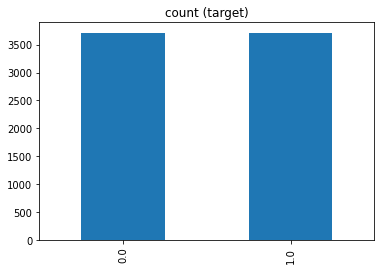

In [19]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total Fraud of 1 and 0:",test_under['Fraud'].value_counts())# plot the count after under-sampeling
test_under['Fraud'].value_counts().plot(kind='bar', title='count (target)')

In [20]:
y = test_under.Fraud
X = test_under.drop(columns = ['Fraud'])


In [21]:
y

4375749    0.0
3469259    0.0
548519     0.0
3934085    0.0
2900717    0.0
          ... 
4622135    1.0
4623394    1.0
4623395    1.0
4632918    1.0
4632919    1.0
Name: Fraud, Length: 7426, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
preds = log_model.predict(X_test)
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

         0.0       0.97      0.88      0.93      1121
         1.0       0.89      0.97      0.93      1107

    accuracy                           0.93      2228
   macro avg       0.93      0.93      0.93      2228
weighted avg       0.93      0.93      0.93      2228



In [24]:
# Saving our model 
file_name = 'model.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(log_model,file)


In [25]:
data.columns[0:]

Index(['Amount', 'OldbalanceOrg', 'NewbalanceOrig', 'OldbalanceDest',
       'NewbalanceDest', 'Fraud', 'Type_CASH_OUT', 'Type_DEBIT',
       'Type_PAYMENT', 'Type_TRANSFER', 'Type2_CM'],
      dtype='object')

In [26]:
data.dtypes


Amount            float64
OldbalanceOrg     float64
NewbalanceOrig    float64
OldbalanceDest    float64
NewbalanceDest    float64
Fraud             float64
Type_CASH_OUT     float64
Type_DEBIT        float64
Type_PAYMENT      float64
Type_TRANSFER     float64
Type2_CM          float64
dtype: object

In [27]:

# Results might differ 

example1 = [2200,1250,1233,2120,0,0,0,0,1,1] # -> 1
example2 = [3200,1500,10000,100000,12000,1,1,0,0,0] # -> 0


In [28]:

data_arr = np.array(example1)
data_arr = np.array(example2)

data_arr = data_arr.reshape(1,-1)

log_model.predict(data_arr)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])